In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [3]:
colors = ['White', 'Yellow', 'Red', 'Green', 'Pink']
plt.style.use(['ggplot', 'dark_background'])

In [4]:
book = pd.read_csv('Book1.csv', sep =';')
book.head(10)

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co
5,1.0,1,6,0.0,11.0,harpy.co
6,1.0,1,7,0.0,11.0,harpy.co
7,1.0,2,2,105.0,0.0,harpy.co
8,1.0,2,3,0.0,2.0,harpy.co
9,1.0,2,4,0.0,2.0,harpy.co


* unsullen.id - идентификатор кузнеца
* production.date - месяц производства
* report.date - месяц отчета
* produced - количество произведенных в данный месяц мечей
* defects - число cломанных мечей
* supplier - поставщик

# 4 Среднее число поломанной продукции после каждого месяца экспуатации, то есть сколько в среднем сломалось после первого месяца, после второго и т.д.

In [5]:
def mean_after_month(book):
    book['report.date'] -= book['production.date']
    book = book.rename(columns={'report.date': 'time_to_death'})
    book = book.drop(['unsullen.id', 'produced'], axis=1)
    book = book.groupby(['production.date', 'supplier', 'time_to_death'], as_index=False).sum()
    book = book.drop(['production.date'], axis=1)
    book = book.groupby(['supplier', 'time_to_death'], as_index=False).mean()
    
    fig = plt.figure(figsize=(10, 5)).add_subplot(111)
    for i in book.supplier.unique():
        sub_table = book.loc[book['supplier'] == i]
        fig.plot(sub_table.time_to_death, sub_table.defects, color = colors[len(i)%5], label = i)
    fig.legend(borderaxespad=0.1, title = 'Среднее количество поломок в месяц')
    plt.savefig('img/1.png')
    plt.show()
    print(book.head(10))

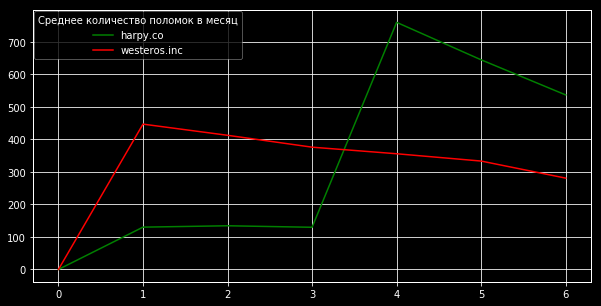

       supplier  time_to_death     defects
0      harpy.co              0    0.000000
1      harpy.co              1  130.166667
2      harpy.co              2  134.400000
3      harpy.co              3  129.750000
4      harpy.co              4  760.333333
5      harpy.co              5  645.000000
6      harpy.co              6  537.000000
7  westeros.inc              0    0.000000
8  westeros.inc              1  447.166667
9  westeros.inc              2  412.800000


In [6]:
mean_after_month(copy.deepcopy(book))

# 5 Качество продукции за каждый месяц. Т.е. считаем процент сломавшейся продукции, которая была произведена в i-й месяц.

In [7]:
def crack_production(book):
    book = book.drop(['report.date', 'unsullen.id'], axis=1)
    book = book.groupby(['supplier', 'production.date'], as_index=False).sum()
    book['percent'] = book['defects']/book['produced']*100
    fig = plt.figure(figsize=(10, 5)).add_subplot(111)
    for i in book.supplier.unique():
        sub_table = book.loc[book['supplier'] == i]
        fig.plot(sub_table['production.date'], sub_table.percent, color = colors[len(i)%5], label = i)
    fig.legend(borderaxespad=0.1, title = 'Процент сломавшейся продукции, произведенный в каждый месяц')
    plt.savefig('img/2.png')
    plt.show()
    print(book.head(10))

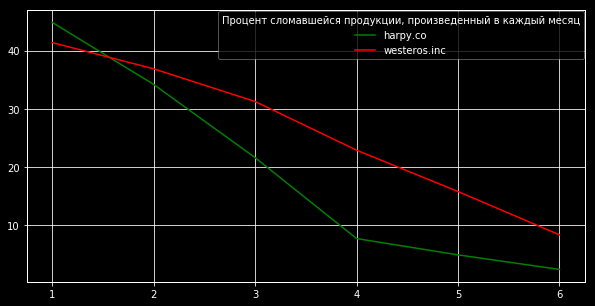

       supplier  production.date  produced  defects    percent
0      harpy.co                1    5248.0   2355.0  44.874238
1      harpy.co                2    5256.0   1798.0  34.208524
2      harpy.co                3    5243.0   1134.0  21.628838
3      harpy.co                4    5282.0    408.0   7.724347
4      harpy.co                5    5243.0    258.0   4.920847
5      harpy.co                6    5260.0    127.0   2.414449
6  westeros.inc                1    5280.0   2186.0  41.401515
7  westeros.inc                2    5272.0   1945.0  36.893020
8  westeros.inc                3    5298.0   1657.0  31.275953
9  westeros.inc                4    5285.0   1211.0  22.913907


In [8]:
crack_production(copy.deepcopy(book))

# 2 Количество произведенного и сломавшегося оружия в каждый месяц.

In [9]:
def crack_and_make(book):
    book = book.drop(['report.date', 'unsullen.id'], axis=1)
    book = book.groupby(['supplier', 'production.date'], as_index=False).sum()
    prod_book = book.pivot(index = 'production.date', columns = 'supplier', values = 'produced')
    crack_book = book.pivot(index = 'production.date', columns = 'supplier', values = 'defects')
    fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
    prod_book.plot(ax = axes[0], kind='Bar', title = 'Произвели')
    crack_book.plot(ax = axes[1], kind='Bar', title = 'Сломали')
    plt.savefig('img/3.png')
    plt.show()
    print(prod_book.head(10))
    print("\n\n\n")
    print(crack_book.head(10))

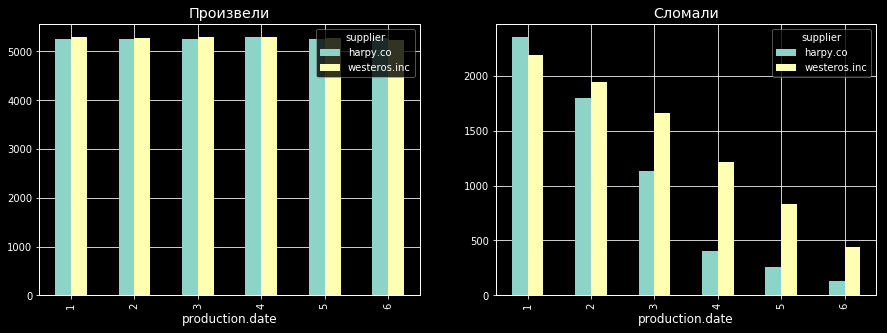

supplier         harpy.co  westeros.inc
production.date                        
1                  5248.0        5280.0
2                  5256.0        5272.0
3                  5243.0        5298.0
4                  5282.0        5285.0
5                  5243.0        5263.0
6                  5260.0        5227.0




supplier         harpy.co  westeros.inc
production.date                        
1                  2355.0        2186.0
2                  1798.0        1945.0
3                  1134.0        1657.0
4                   408.0        1211.0
5                   258.0         832.0
6                   127.0         437.0


In [10]:
crack_and_make(copy.deepcopy(book))

# 3 Построим плотность поломок для каждого месяца производства.

In [15]:
def all_time(book):
    book = book.drop(['report.date', 'production.date', 'unsullen.id'], axis=1)
    book = book.groupby(['supplier'], as_index=False).sum()
    fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols = len(book.supplier.unique()))
    number = 0
    for i in book.supplier.unique():
        sub_table = book.loc[book['supplier'] == i]
        sub_table.plot(ax = axes[number], kind='Bar', title = i)
        number+=1
    plt.savefig('img/6.png')
    plt.show()
    book['percent'] = book['defects']/book['produced']*100
    print(book.head(10))

In [11]:
def month_cracked_prod(book):
    book = book.drop(['report.date', 'unsullen.id'], axis=1)
    book = book.groupby(['supplier', 'production.date'], as_index=False).sum()
    book['defects'] = book['defects']/book['produced']/(7 - book['production.date'])*100
    fig = plt.figure(figsize=(10, 5)).add_subplot(111)
    for i in book.supplier.unique():
        sub_table = book.loc[book['supplier'] == i]
        fig.plot(sub_table['production.date'], sub_table.defects, color = colors[len(i)%5], label = i)
    fig.legend(borderaxespad=0.1, title = 'Плотность поломок в месяц')
    plt.savefig('img/4.png')
    plt.show()
    print(book.head(10))

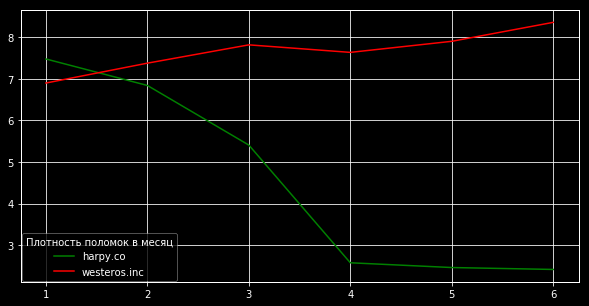

       supplier  production.date  produced   defects
0      harpy.co                1    5248.0  7.479040
1      harpy.co                2    5256.0  6.841705
2      harpy.co                3    5243.0  5.407210
3      harpy.co                4    5282.0  2.574782
4      harpy.co                5    5243.0  2.460423
5      harpy.co                6    5260.0  2.414449
6  westeros.inc                1    5280.0  6.900253
7  westeros.inc                2    5272.0  7.378604
8  westeros.inc                3    5298.0  7.818988
9  westeros.inc                4    5285.0  7.637969


In [12]:
month_cracked_prod(copy.deepcopy(book))

# 6 График зависимости количества поломок от кузнеца для каждой компании.

In [13]:
def unsullens(book):
    book = book.drop(['report.date', 'production.date'], axis=1)
    book = book.groupby(['supplier', 'unsullen.id'], as_index=False).sum()
    fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols = len(book.supplier.unique()))
    number = 0
    for i in book.supplier.unique():
        sub_table = book.loc[book['supplier'] == i]
        sub_table.index = sub_table['unsullen.id']
        sub_table = sub_table.drop(['supplier', 'unsullen.id'], axis=1)
        sub_table.plot(ax = axes[number], kind='Bar', title = i)
        number+=1
    plt.savefig('img/5.png')
    plt.show()
    print(book.head(10))

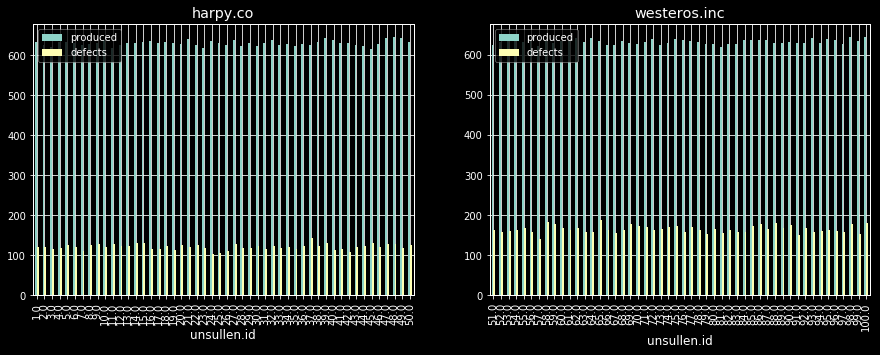

   supplier  unsullen.id  produced  defects
0  harpy.co          1.0     633.0    120.0
1  harpy.co          2.0     625.0    122.0
2  harpy.co          3.0     621.0    117.0
3  harpy.co          4.0     633.0    119.0
4  harpy.co          5.0     634.0    127.0
5  harpy.co          6.0     630.0    120.0
6  harpy.co          7.0     626.0    112.0
7  harpy.co          8.0     629.0    127.0
8  harpy.co          9.0     631.0    129.0
9  harpy.co         10.0     638.0    122.0


In [14]:
unsullens(copy.deepcopy(book))

# 1 Количество произведенных и сломавшихся мечей для каждой из компаний.

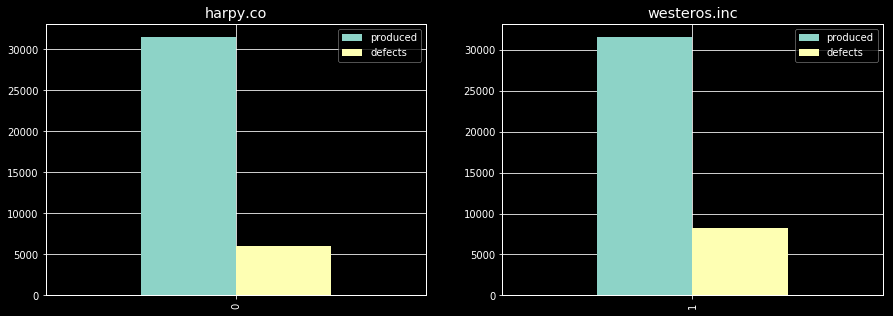

       supplier  produced  defects    percent
0      harpy.co   31532.0   6080.0  19.281999
1  westeros.inc   31625.0   8268.0  26.143874


In [16]:
all_time(copy.deepcopy(book))